## <span style="color:#000080"> **Análise Exploratória e Qualidade dos Dados**

### <span style="color:#4169E1"><b>1.1 Definição de pronto:</span> Dados analisados e insights documentados

### <span style="color:#4169E1"><b>1.2 Definição de entregue:</span> Notebook executando sem erros
### .....................................................................................................................

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.preprocessing as sklpp
import geopandas as gp

pd.set_option("display.precision", 4)

import warnings
warnings.filterwarnings("ignore")

### ***A) Importar Dados de Chuvas, Pressao, Precipitação e Temperatura***

In [3]:
# Carga do arquivo csv preparada para a análise exploratória de dados. Ajustes de separador, primeira coluna como índice e parse de Data.
df_patio = pd.read_csv('../../Data/process/resultDados_patio1_completo.csv', delimiter=';', index_col=0, parse_dates=['Data'])

### <span style="color:#006400"> **B) Análise sobre os Dados**

#### <span style="color:#228B22">B1. Verificação de formato dos dados. 5 registros.

In [3]:
df_patio.head(5)

,Longitude,Latitude,Magnitude_Observada,Direcao,Data,Valor_Pressao,Valor_Temp,Valor_Chuva,Magnitude_Verif
0,-42.75,-14.25,6.82,97.36,2017-01-01 00:00:00,1013.14,25.93,0.0,9.82
1,-42.75,-14.25,6.91,94.65,2017-01-01 01:00:00,1013.34,25.73,0.0,8.74
2,-42.75,-14.25,7.27,92.98,2017-01-01 02:00:00,1013.04,25.50,0.0,8.45
3,-42.75,-14.25,7.83,93.62,2017-01-01 03:00:00,1012.92,23.67,0.0,9.18
4,-42.75,-14.25,7.81,96.33,2017-01-01 04:00:00,1013.07,22.97,0.0,9.19


#### <span style="color:#228B22"> B2. Verificação de nulidade e tipos de dados. 

In [4]:
df_patio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Longitude            8760 non-null   float64       
 1   Latitude             8760 non-null   float64       
 2   Magnitude_Observada  8760 non-null   float64       
 3   Direcao              8760 non-null   float64       
 4   Data                 8760 non-null   datetime64[ns]
 5   Valor_Pressao        8760 non-null   float64       
 6   Valor_Temp           8760 non-null   float64       
 7   Valor_Chuva          8760 non-null   float64       
 8   Magnitude_Verif      8760 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 684.4 KB


#### <span style="color:#228B22">B3. Estatísticas Gerais

In [5]:
df_patio.describe()

,Longitude,Latitude,Magnitude_Observada,Direcao,Valor_Pressao,Valor_Temp,Valor_Chuva,Magnitude_Verif
count,8760.00,8760.00,8760.0000,8760.0000,8760.0000,8760.0000,8760.0000,8760.0000
mean,-42.75,-14.25,5.7703,106.3479,1015.0073,24.9033,0.0426,7.9984
std,0.00,0.00,2.1793,45.6072,3.7491,4.4547,0.2733,2.7865
min,-42.75,-14.25,0.0200,0.7100,1005.1900,14.1300,0.0000,0.7800
25%,-42.75,-14.25,4.2900,90.8075,1012.2400,21.6100,0.0000,6.0800
50%,-42.75,-14.25,6.1300,96.7950,1014.6000,24.6000,0.0000,8.1500
75%,-42.75,-14.25,7.4400,105.6100,1017.6100,27.8500,0.0000,9.8800
max,-42.75,-14.25,11.8800,358.1200,1026.8000,36.2700,6.7500,16.9400


#### <span style="color:#228B22">B4. Variação dinâmica das variáveis

In [6]:
for (column, _ ) in df_patio.filter(items=['Longitude','Latitude','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva','Magnitude_Verif','Magnitude_Observada']).items():
    print(f'{column} \t faixa dinâmica: {"{:.2f}".format(df_patio[column].max() - df_patio[column].min())}')

Longitude 	 faixa dinâmica: 0.00
Latitude 	 faixa dinâmica: 0.00
Direcao 	 faixa dinâmica: 357.41
Valor_Pressao 	 faixa dinâmica: 21.61
Valor_Temp 	 faixa dinâmica: 22.14
Valor_Chuva 	 faixa dinâmica: 6.75
Magnitude_Verif 	 faixa dinâmica: 16.16
Magnitude_Observada 	 faixa dinâmica: 11.86


### <span style="color:#006400"> **C) Visualização Gráfica - Mapa**

#### <span style="color:#228B22">C1. Criando informação de ponto geométrico 

In [7]:
df_patio_coord = pd.read_csv('../../Data/raw/eolica/00_cadastro_patio.txt', delimiter=';', index_col=0)
df_patiog = gp.GeoDataFrame(df_patio_coord, geometry=gp.points_from_xy(df_patio_coord.Longitude, df_patio_coord.Latitude))

# df_patiog = gp.GeoDataFrame(df_patio, geometry=gp.points_from_xy(df_patio.Longitude, df_patio.Latitude))
# df_patiog.head(5)

#### <span style="color:#228B22">C2. Plotando o ponto no mapa >>> Achar shape dos estados do Brasil onde os pontos serão mostrados <<<

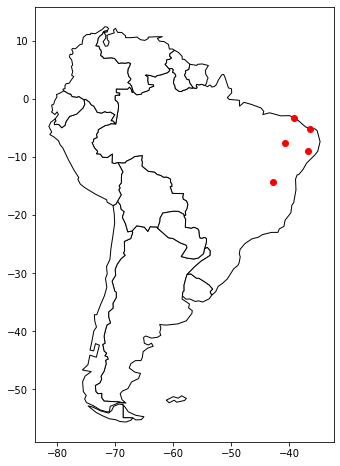

In [8]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# Restrito para América do Sul
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black',figsize=(10, 8))

# Plotando o gráfico.
df_patiog.plot(ax=ax, color='red')

plt.show()

### <span style="color:#006400"> **D) Visualização Gráfica - Histograma**

#### <span style="color:#228B22"> D1. Histogramas com as distribuições das variáveis

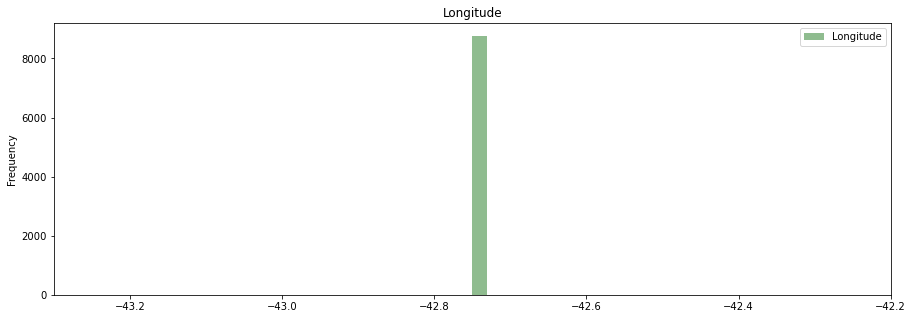

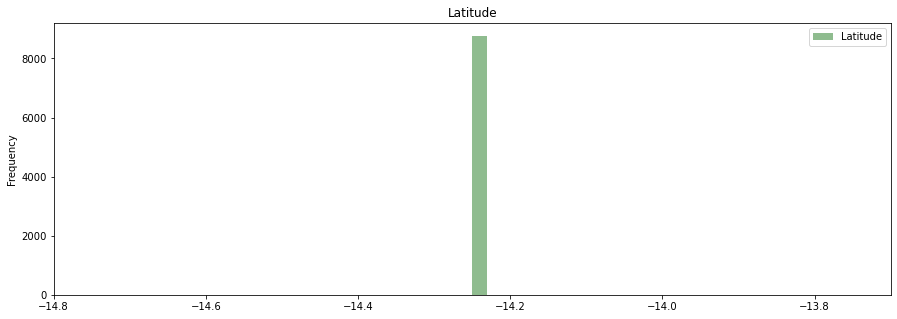

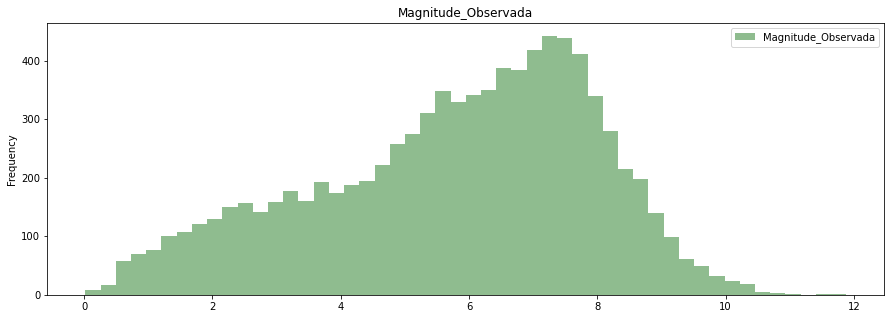

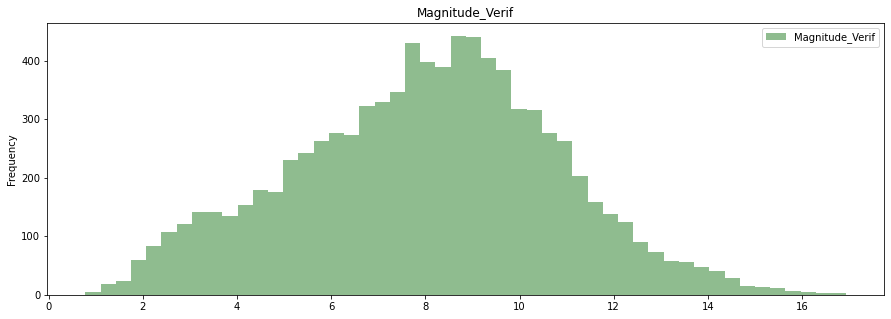

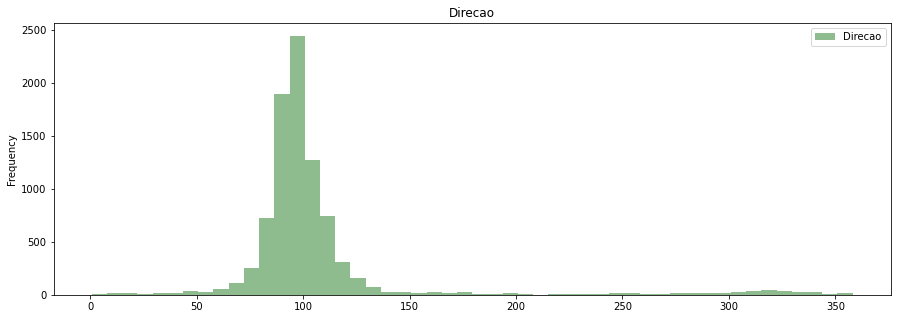

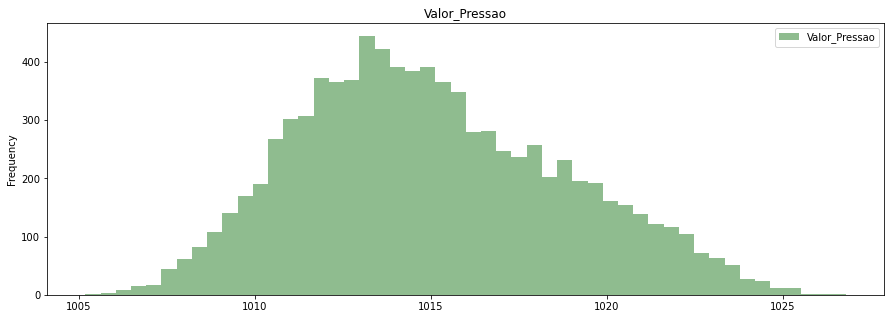

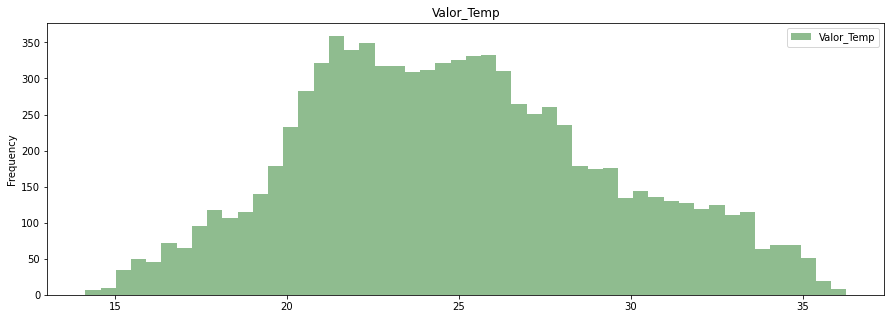

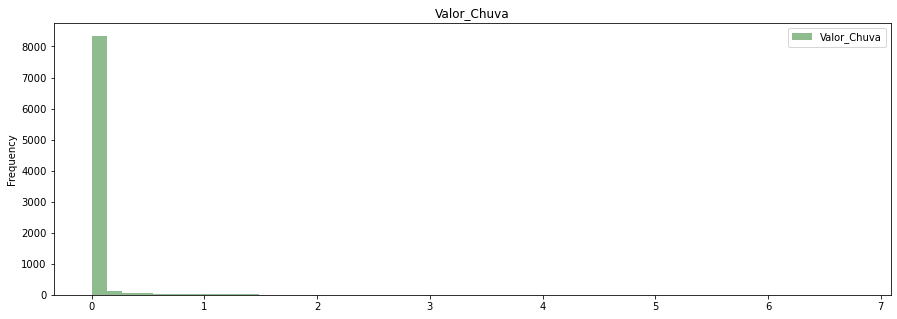

In [9]:
for (column, _ ) in df_patio.filter(items=['Longitude','Latitude','Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva']).items():
    plt.figure()
    df_patio[column].plot.hist(bins=50, figsize=(15,5), legend=True,color='#8FBC8F');
    plt.legend(ncol = 1)
    plt.title(column)

#### <span style="color:#228B22">D2. Utilizando KDE - Kernel Density Estimate

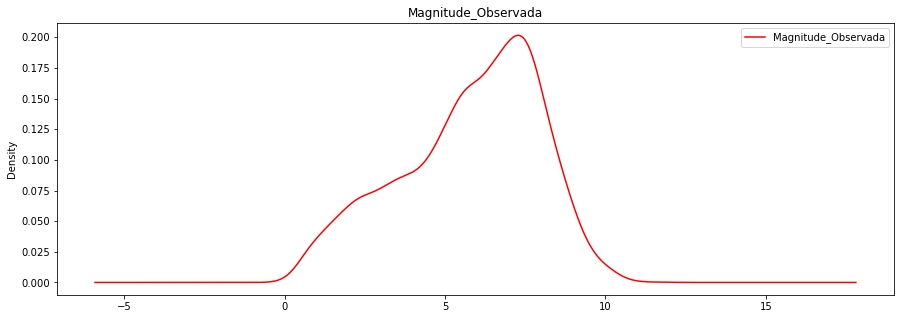

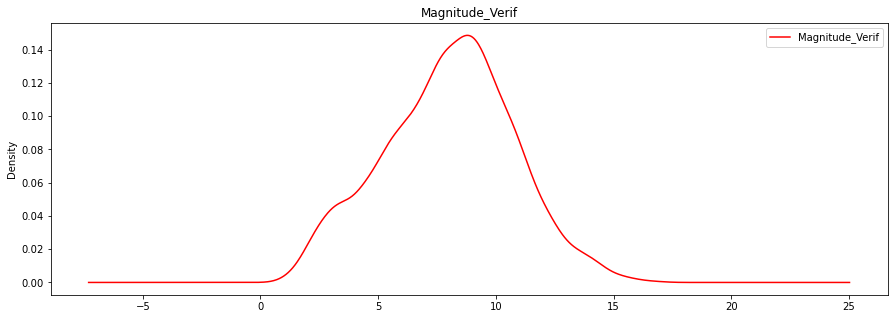

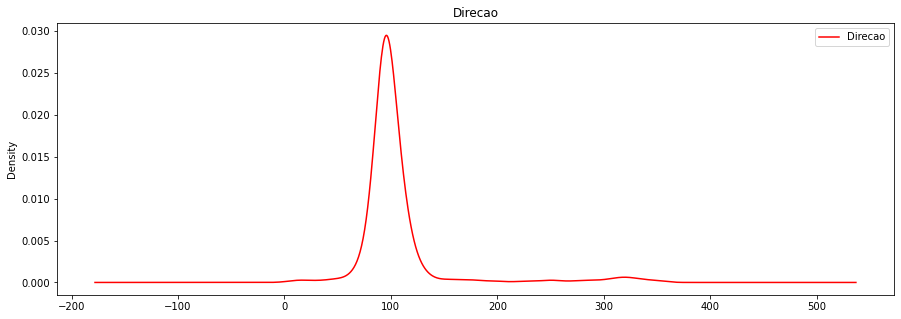

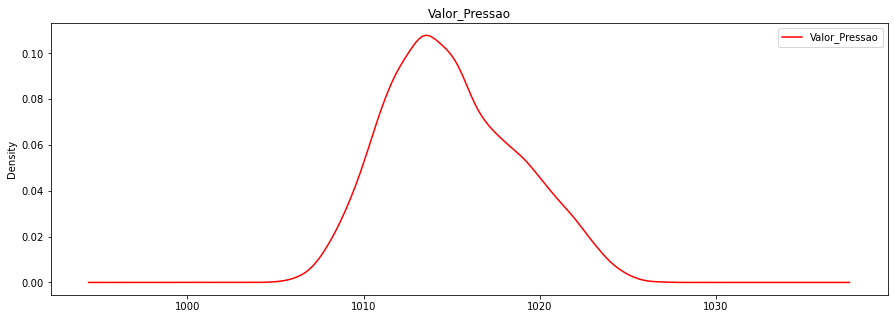

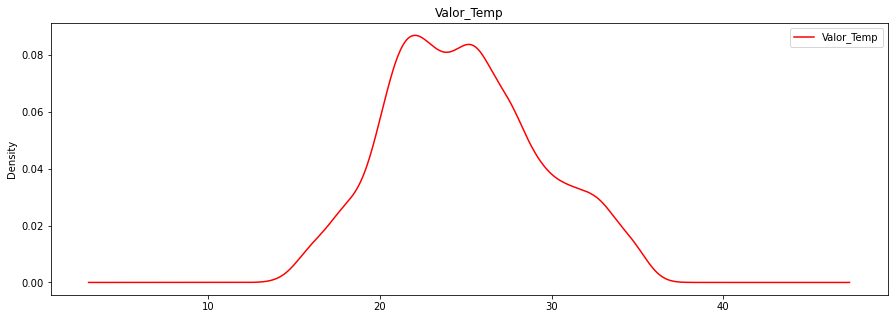

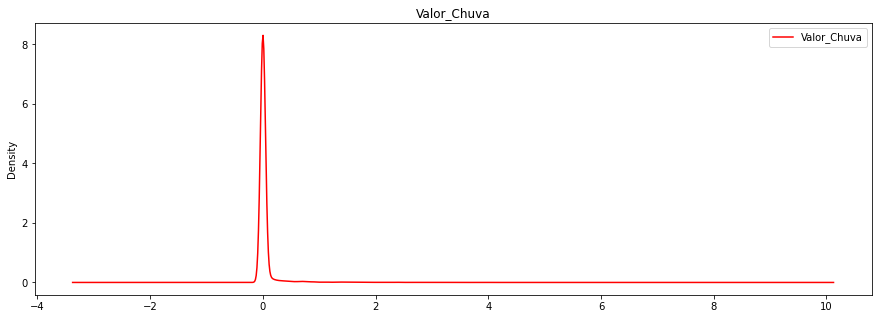

In [10]:
for (column, _ ) in df_patio.filter(items=['Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva']).items():
    plt.figure()
    df_patio[column].plot.kde(figsize=(15,5), legend=True,color='red');
    plt.legend(ncol = 1)
    plt.title(column)

### <span style="color:#006400"> **E) Coeficientes de correlação**

#### <span style="color:#228B22">E1. Visão Tabular

In [11]:
df_patio.corr()

,Longitude,Latitude,Magnitude_Observada,Direcao,Valor_Pressao,Valor_Temp,Valor_Chuva,Magnitude_Verif
Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnitude_Observada,NaN,NaN,1.0000,-0.2498,0.5722,-0.5180,-0.1500,0.6807
Direcao,NaN,NaN,-0.2498,1.0000,-0.1582,0.0960,0.1312,-0.1713
Valor_Pressao,NaN,NaN,0.5722,-0.1582,1.0000,-0.5698,-0.1352,0.4512
Valor_Temp,NaN,NaN,-0.5180,0.0960,-0.5698,1.0000,-0.0290,-0.2718
Valor_Chuva,NaN,NaN,-0.1500,0.1312,-0.1352,-0.0290,1.0000,-0.1181
Magnitude_Verif,NaN,NaN,0.6807,-0.1713,0.4512,-0.2718,-0.1181,1.0000


#### <span style="color:#228B22">E2. Mapa de Calor

<AxesSubplot:>

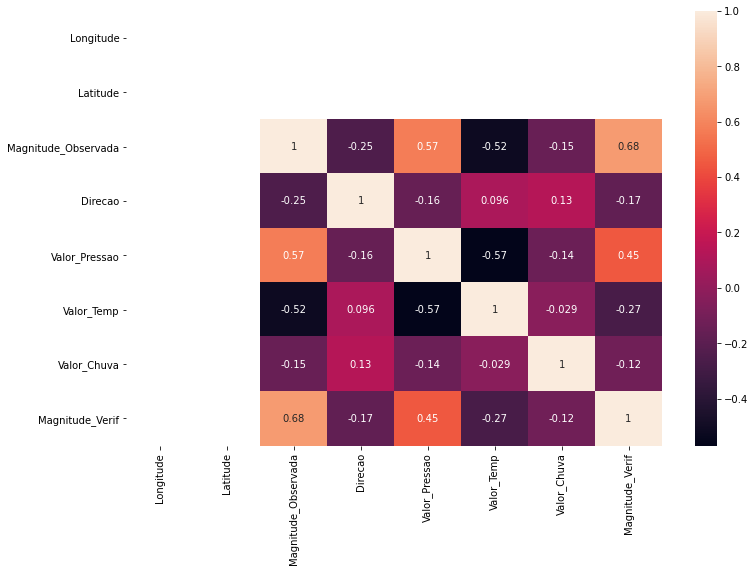

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df_patio.corr(), annot=True) #annot mostra os coeficientes da matriz

### <span style="color:#006400"> **F) Visualização Gráfica - Scatterplot**

#### <span style="color:#228B22">F1. Com kde e regressão linear nas correlações

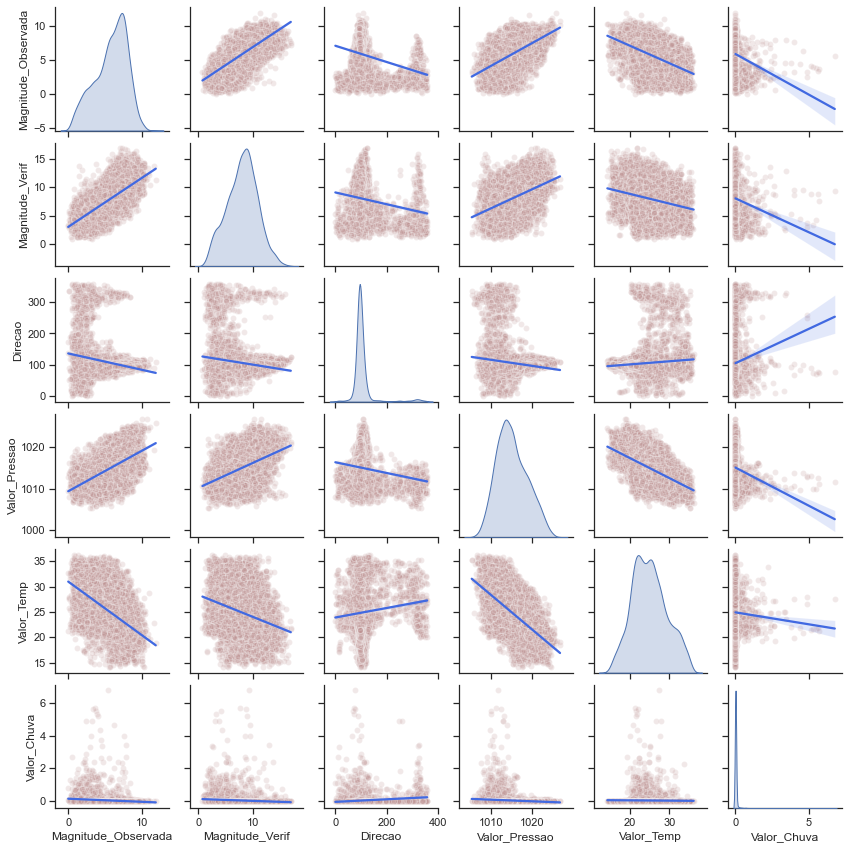

In [12]:
sns.pairplot(df_patio.filter(items=['Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva']), diag_kind="kde", kind="reg", height=2.0
            ,plot_kws={'line_kws':{'color':'#4169E1'}, 
                           'scatter_kws': {'alpha': 0.2, 'color': '#BC8F8F','edgecolor': 'w'}})

### <span style="color:#006400"> **G) Visualização Gráfica - Box Plot**

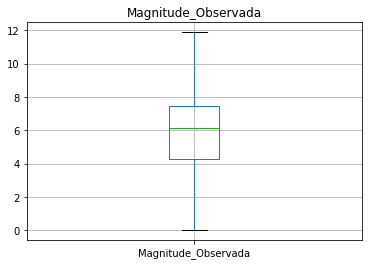

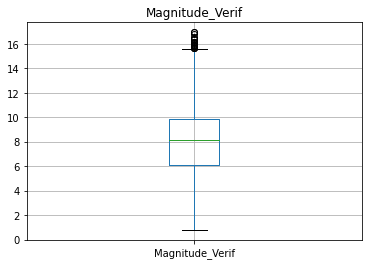

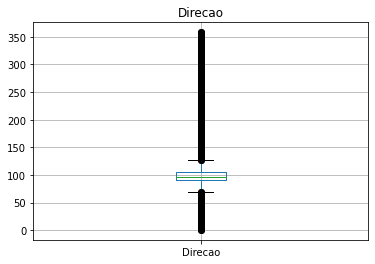

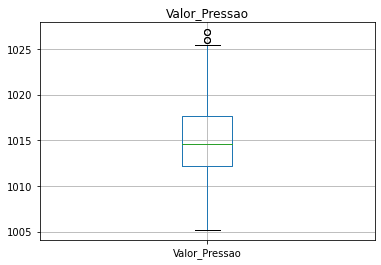

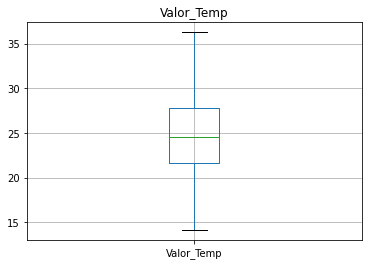

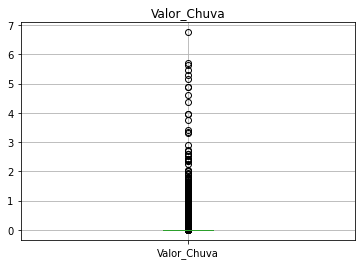

In [14]:
for (column, _ ) in df_patio.filter(items=['Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva']).items():
    plt.figure()
    df_patio.boxplot(column = column);
    plt.title(column)

### <span style="color:#D2691E"> **H) Normalização dos dados por Mínimo e Máximo**

#### <span style="color:#A0522D">H1. Usando MinMaxScaler para normalizar cada coluna

In [6]:
min_max_scaler = sklpp.MinMaxScaler()

df_patio_filtrado = df_patio.filter(items=['Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva'])

df_patio_normalizado = min_max_scaler.fit_transform(df_patio_filtrado)
df_patio_normalizado = pd.DataFrame(df_patio_normalizado)

# scikit learn retira as colunas do dataframe modificado. Colocando-as de volta
df_patio_normalizado.columns = df_patio_filtrado.columns

# visualização da normalização
df_patio_normalizado.head()

,Magnitude_Observada,Magnitude_Verif,Direcao,Valor_Pressao,Valor_Temp,Valor_Chuva
0,0.5734,0.5594,0.2704,0.3679,0.5330,0.0
1,0.5809,0.4926,0.2628,0.3771,0.5239,0.0
2,0.6113,0.4746,0.2582,0.3633,0.5136,0.0
3,0.6585,0.5198,0.2600,0.3577,0.4309,0.0
4,0.6568,0.5204,0.2675,0.3646,0.3993,0.0


#### <span style="color:#A0522D">**H2.Grafico Paiplot com Valores Normalizados**

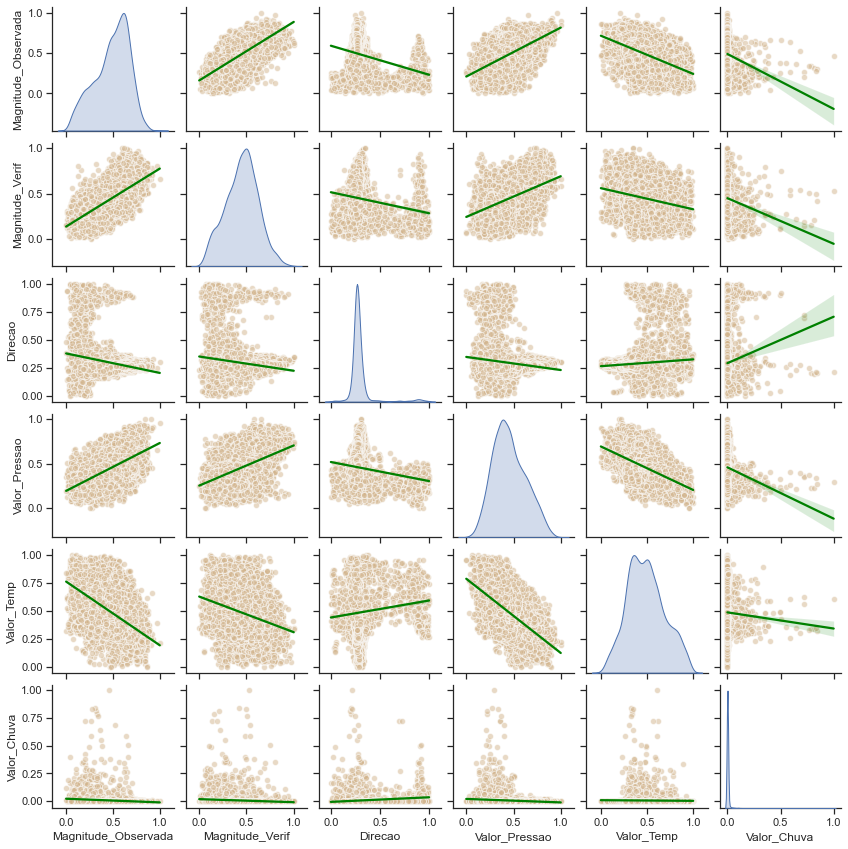

In [11]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_patio_normalizado, diag_kind="kde", kind="reg", height=2.0, plot_kws={'line_kws':{'color':'#008000'}, 
                           'scatter_kws': { 'color': '#D2B48C','edgecolor': 'w','alpha': 0.5}}) 

#### <span style="color:#A0522D">**H2.Grafico BoxPlot com Valores Normalizados**

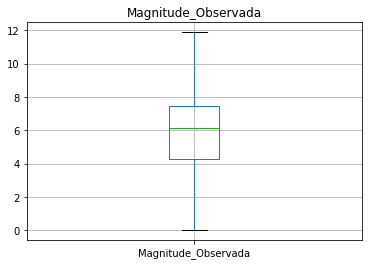

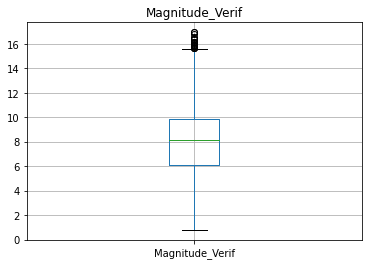

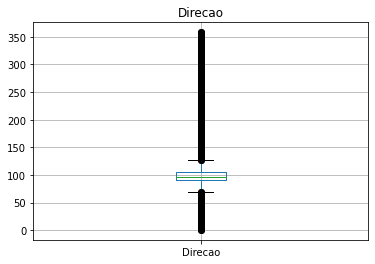

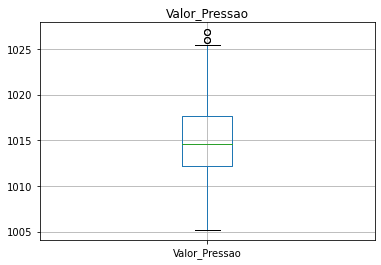

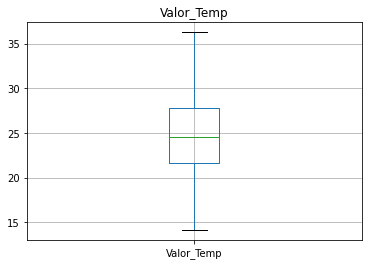

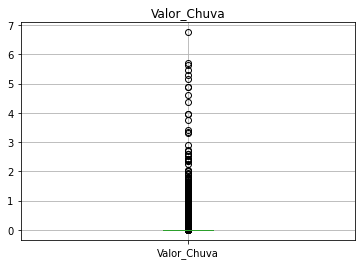

In [18]:
for (column, _ ) in df_patio_normalizado.items():
    plt.figure()
    df_patio.boxplot(column = column);
    plt.title(column)